In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 머신러닝 패키지 import
import statsmodels.api as sm
import sklearn

# 한글 설정 /차트 마이너스 깨짐현상 해결
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False},style='darkgrid')

#### 데이터준비

다중분류 (7가지 생선중에서 무얼까?)

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [3]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [4]:
pd.unique(fish.Species)

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [31]:
# 훈련을 시킬 입력데이터(다섯가지 특성)
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [33]:
#'Weight','Length','Diagonal','Height','Width'-->x0, x1, x2, x3, x4
fish_input[154:]

array([[12.2   , 12.2   , 13.4   ,  2.0904,  1.3936],
       [13.4   , 12.4   , 13.5   ,  2.43  ,  1.269 ],
       [12.2   , 13.    , 13.8   ,  2.277 ,  1.2558],
       [19.7   , 14.3   , 15.2   ,  2.8728,  2.0672],
       [19.9   , 15.    , 16.2   ,  2.9322,  1.8792]])

In [7]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [34]:
# 어종에 대한 예측할 결과값
fish_target = fish['Species'].to_numpy()
fish_target[154:]

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'], dtype=object)

In [9]:
from sklearn.model_selection import train_test_split # 함수는 하나의 기능을 위해서 import
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)# random_state를 바꾸면서 훈련해도 됨,test size를 설정하면 8:2 or 7:3 정도로 내가 원하는 정도로 트레이닝과테스트 데이터로 나뉜다.

In [10]:
print(train_input.shape)
print(test_input.shape)

(119, 5)
(40, 5)


#### 단위값 표준화

In [11]:
#weight 8~1000, width 5~10 단위 갭 무지 많이 남 --> -2 ~ 2 정도의 실수로 변형
# 표준화식 = (실제값 - mean(평균))/std(표준편차)
from sklearn.preprocessing import StandardScaler #클래스 = 여러가지 함수를 같이 사용할 수 있게한다

ss = StandardScaler() # 클래스는 생성자를 만들어야 한다.
ss.fit(train_input) # x0~x4 평균, 표준편차 등을 구해놓음

train_scaled = ss.transform(train_input) # 표준화 식 대입해서 표준화시킴
test_scaled = ss.transform(test_input)

In [12]:
train_scaled[:20]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ],
       [-0.9127463 , -0.96490079, -0.95281644, -0.88017186, -0.99153566],
       [-0.79734143, -0.70251203, -0.76172762, -0.78282455, -0.54453018],
       [ 0.63818253,  0.56257661,  0.73223951,  1.64473401,  0.50705737],
       [-0.74104638, -0.67439895, -0.73567006, -0.61205928, -0.55733138],
       [-0.86771025, -0.7962223 , -0.89201546, -0.93358694, -1.02183182],
       [ 0.82114147,  0.74999715,  0.67143852,  0.4984706 ,  1.47257213],
       [ 0.30041219,  0.23459067,  0.42823457,  1.36042157,  0.22329758],
       [ 0.33981873,  0.40326915,  0.23714575,  0.28831696,  0.95686692],
       [-0.54401367, -0.51509149, -0.4

#### k-최근접 이웃 분류 알고리즘 분류

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [15]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [16]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [17]:
print(kn.classes_)
proda = kn.predict_proba(test_scaled[:5]) # 예측값을 한눈에 파악하기 위한 함수
print(np.round(proda, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


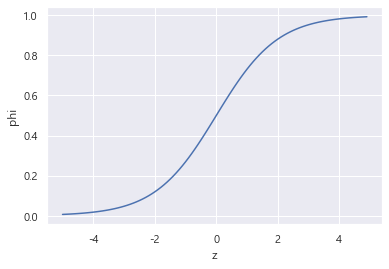

In [18]:
# 시그모이드 함수 값이 0~1
z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z)) # exp는 지수함수 계산, 시그모이드 함수 계산
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### 로지스틱 이진분류

In [19]:
# 로지스틱 회귀는 0을 기준으로 대칭이기 때문에 값을 2가지 판단 가능하다.
# 전체에서  Bream, Smelt만 뽑아내기 위해서 인덱스 추출
bream_smelt_indexes = (train_target == "Bream")| (train_target == 'Smelt')

In [20]:
bream_smelt_indexes

array([ True, False,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False,  True,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False])

In [21]:
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [35]:
target_bream_smelt

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

#### 이항 로지스틱 회귀(두개만 분류) Bream|Smelt

In [22]:
from sklearn.linear_model import LogisticRegression # 로지스틱회귀(분류)

lr = LogisticRegression() # 로지스틱 회귀 클래스
lr.fit(X=train_bream_smelt, y=target_bream_smelt)

LogisticRegression()

In [23]:
# 정확도
lr.score(X=train_bream_smelt, y=target_bream_smelt)

1.0

In [24]:
# 실제 타겟값
target_bream_smelt[:5]

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [25]:
# 예측 값을 확인
lr.predict(X=train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [26]:
lr.predict_proba(X=train_bream_smelt[:5])

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [27]:
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

test 데이터로 예측

In [36]:
# 40 of 159 테스트데이터를 인덱스
bream_smelt_indexes_2 = (test_target == "Bream")| (test_target == 'Smelt')
bream_smelt_indexes_2

array([False,  True, False, False, False,  True,  True, False, False,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False, False])

In [37]:
# 테스트 데이터에서 bream_smelt 추출
test_bream_smelt = test_scaled[bream_smelt_indexes_2]
ttarget_bream_smelt = test_target[bream_smelt_indexes_2]

In [38]:
test_bream_smelt

array([[-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [ 1.70778862,  0.79685229,  0.98412932,  2.49283113,  1.31347159],
       [-1.08726098, -1.67709884, -1.70848587, -1.76175528, -2.01154694],
       [ 0.72262512,  0.46886634,  0.64538096,  1.38570915,  0.7798447 ],
       [ 0.58188748,  0.32830094,  0.51509312,  1.62381742,  0.6898706 ],
       [ 0.86336276,  0.60943175,  0.80172635,  1.82199404,  0.69535682],
       [ 1.48260839,  0.93741769,  1.11441715,  2.26561331,  1.13260901],
       [ 0.86336276,  0.42201121,  0.61063753,  1.48117965,  0.51028814],
       [-1.07881672, -1.56464651, -1.57819804, -1.64186151, -1.92900972],
       [ 0.610035  ,  0.46886634,  0.6366951 ,  1.67197249,  0.41787572],
       [ 0.30041219,  0.2814458 ,  0.44560628,  1.20923936, -0.04894113],
       [ 0.30041219,  0.20647759,  0.42823457,  1.32466334,  0.31156486],
       [ 1.58112475,  0.93741769,  1.10573129,  2.27724461,  1.12389201],
       [-1.0881054 , -1.75206705, -1.7

In [41]:
ttarget_bream_smelt

array(['Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream'], dtype=object)

In [42]:
# 테스트 데이터로 정확도 확인
lr.score(X=test_bream_smelt, y=ttarget_bream_smelt)

1.0

In [43]:
print(ttarget_bream_smelt)

['Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']


In [46]:
lr.predict(X=train_bream_smelt)

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [50]:
# 확률표 도출 Bream, Smelt
proda = lr.predict_proba(X=test_bream_smelt)
print(np.round(proda, decimals=3)) # 확률료를 0~1사이로 바꿔준다

[[0.04  0.96 ]
 [0.999 0.001]
 [0.026 0.974]
 [0.994 0.006]
 [0.994 0.006]
 [0.997 0.003]
 [0.999 0.001]
 [0.994 0.006]
 [0.036 0.964]
 [0.994 0.006]
 [0.981 0.019]
 [0.986 0.014]
 [0.999 0.001]
 [0.023 0.977]
 [0.034 0.966]
 [0.951 0.049]]


In [28]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [29]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [30]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


#### 로지스틱 회귀 다중분류

이전 이진 분류 -> 확장하면 다중 분류

In [57]:
lr = LogisticRegression(C=20, max_iter=200)# C는 규제의 정도를 나타냄 숫자가 작을 수록 규제가 강해짐. max_iter 반복훈련 횟수
lr.fit(X=train_scaled, y=train_target)

LogisticRegression(C=20, max_iter=200)

In [58]:
print(lr.score(X=train_scaled, y= train_target))
print(lr.score(X=test_scaled, y= test_target))

0.9327731092436975
0.925


In [60]:
lr.predict(test_scaled[:10])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike'], dtype=object)

lr.predict(test_scaled[:10]) : 예측값 'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Bream', 'Smelt',
       'Roach', 'Perch', 'Pike'

test_target[:10] : 실제값 'Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike'

In [63]:
# 예측과 실제가 맞는지 확인
print(test_target[:10])
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:10])
print(np.round(proda, decimals=3))

['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch' 'Bream' 'Smelt' 'Roach'
 'Perch' 'Pike']
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.04  0.96 ]
 [0.999 0.001]
 [0.026 0.974]
 [0.994 0.006]
 [0.994 0.006]
 [0.997 0.003]
 [0.999 0.001]
 [0.994 0.006]
 [0.036 0.964]
 [0.994 0.006]
 [0.981 0.019]
 [0.986 0.014]
 [0.999 0.001]
 [0.023 0.977]
 [0.034 0.966]
 [0.951 0.049]]
